In [1]:
# p266 연습
#아래는 감독자의 직무능력평가 데이터이다. 2가지 (계층, K-평균) 군집분석을 실시하고 결과를 해석하시오.
#데이터 : 직무능력평가.csv( 변수 : 7개, 자료 수 : 30개)

# 1. 데이터 구성하기
# 2. 데이터 전처리(포준화)
# 3. 계층형 군집분석 실시

# -연결방법 변경 및 결과 비교

# -군집 프로파일

import pandas as pd # 데이터 구성 : Series, DataFrame
import numpy as np # 행렬 연산

import matplotlib # 데이터 시각화
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler # Scale 변환 : 평균, 표준편차 기준

# linkage : 계층형 군집분석
# dendrogram : 계층나무 구조
# cluster : linkage로부터 얻은 값으로 군집 생성
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# 군집 방법 : AgglomerativeClustering(계층형), KMeans(k-평균), DBSCAN
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN

from sklearn.metrics import silhouette_samples, silhouette_score # 실루엣(Silhouette) 계수 산출

from yellowbrick.cluster import SilhouetteVisualizer # 실루엣 계수 산출 및 시각화 라이브러리

# pip install yellowbrick

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False
# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'

import warnings # 폰트체크 경고 무시
warnings.filterwarnings('ignore')

In [3]:
# p267 연습
# 데이터 구성하기
df_raw = pd.read_csv("/home/piai/다운로드/2주차 실습파일/2. Big Data 분석/직무능력평가.csv")
df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,43,51,30,39,61,92,45
1,63,64,51,54,63,73,47
2,71,70,68,69,76,86,48
3,61,63,45,47,54,84,35
4,81,78,56,66,71,83,47


In [4]:
# 데이터 전처리 - Scaling

# 데이터 표준화
scaler = StandardScaler()
df_raw_scaled = scaler.fit_transform(df_raw)

df_raw_scaled[:5]

array([[-1.8076031 , -1.19166169, -1.92300586, -1.50494461, -0.35542617,
         1.77141034,  0.20430138],
       [-0.13647543, -0.19861028, -0.17733772, -0.20508842, -0.15977874,
        -0.18159526,  0.4020124 ],
       [ 0.53197564,  0.25972114,  1.23582221,  1.09476777,  1.11192959,
         1.15467173,  0.50086791],
       [-0.30358819, -0.27499885, -0.67610004, -0.81168798, -1.0401922 ,
         0.9490922 , -0.78425369],
       [ 1.36753948,  0.87082969,  0.23829756,  0.83479653,  0.622811  ,
         0.84630243,  0.4020124 ]])

In [5]:
# p268 연습
# 데이터 전처리 - 데이터 분리

# 목표 변수 : 모든 행 & 1번째 열
df_raw_y = df_raw_scaled[:, 0] # eval 목표변수 분리

# 설명 변수 : 모든 행 & 1번째 제외한 모든 열
df_raw_x = df_raw_scaled[:, 1::] # 그외 분리

In [6]:
# p269 연습
# 계층형 군집분석 - 군집 형성

# 연결 : ward, 거리 계산 : Euclidean
Z_ward = linkage(df_raw_x, method = "ward", metric = "euclidean")
 
# 연결 : average, 거리 계산 : Euclidean
Z_average = linkage(df_raw_x, method = "average", metric = "euclidean")

In [7]:
# p 269 연습
# 군집 생성 결과 확인
Z_ward
#        자료 번호       자료 번호            거리     군집의 자료
# 14와 26의 거리가 가장 짧은 것을 확인
# 56과 57의 거리가 가장 긴 것을 확인

# 14번과 26번 자료가 군집 형성, 거리 = 0.521, 자료 수 2, 군집 번호 = 30
# 전체 자료 30개 -> 최대 인덱스 29개)

# 11번 자료와 생성된 군집 32번 (9번과 22번) 군집 형성, 거리 = 1.317, 자료 수 = 3

array([[14.        , 26.        ,  0.52156235,  2.        ],
       [ 3.        , 27.        ,  0.65700712,  2.        ],
       [ 9.        , 22.        ,  0.84734214,  2.        ],
       [16.        , 28.        ,  1.13863458,  2.        ],
       [ 6.        ,  7.        ,  1.17063718,  2.        ],
       [ 1.        , 21.        ,  1.22298201,  2.        ],
       [11.        , 32.        ,  1.31728974,  3.        ],
       [ 2.        ,  4.        ,  1.33423955,  2.        ],
       [24.        , 36.        ,  1.47235046,  4.        ],
       [30.        , 37.        ,  1.65014418,  4.        ],
       [18.        , 35.        ,  1.78970024,  3.        ],
       [29.        , 34.        ,  1.8539993 ,  3.        ],
       [10.        , 12.        ,  1.88477465,  2.        ],
       [31.        , 38.        ,  1.94570646,  6.        ],
       [25.        , 33.        ,  2.11914806,  3.        ],
       [ 5.        , 42.        ,  2.16582648,  3.        ],
       [17.        , 19.

Text(0, 0.5, 'Distance')

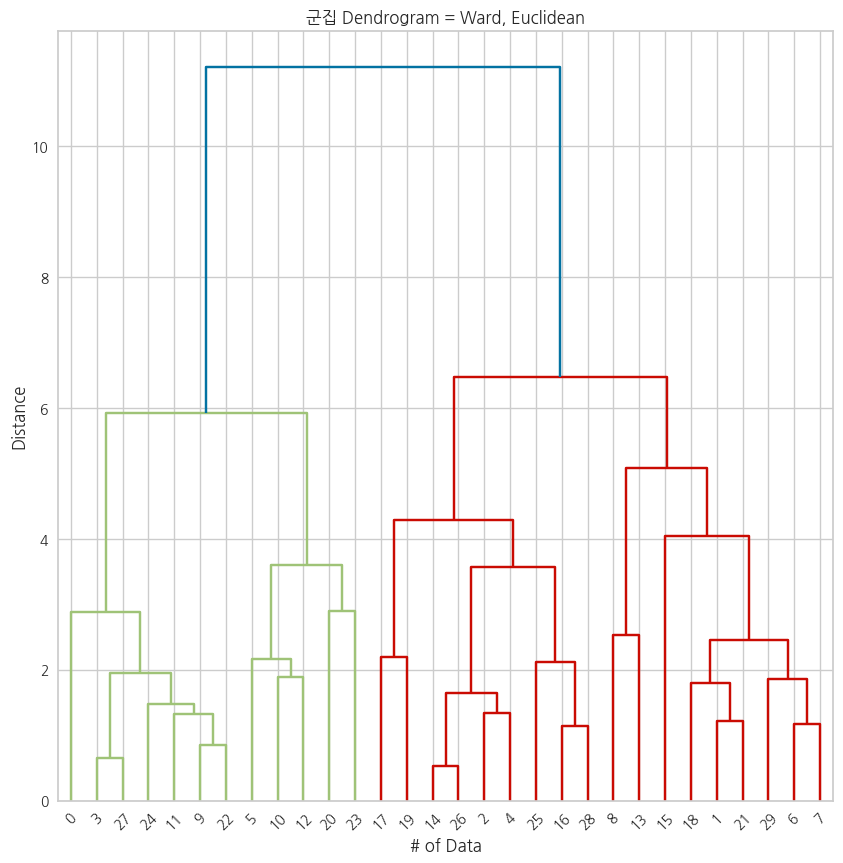

In [11]:
# p 269 연습
# 덴드로그램 [연결 : ward, 거리 계산 : Euclidean]
plt.figure(figsize = (10, 10))
ax = plt.subplot(111)

dendrogram(Z_ward, leaf_font_size = 10, orientation = "top")
plt.title("군집 Dendrogram = Ward, Euclidean") # 제목
plt.xlabel("# of Data") # x축
plt.ylabel("Distance") # y축

Text(0, 0.5, 'Distance')

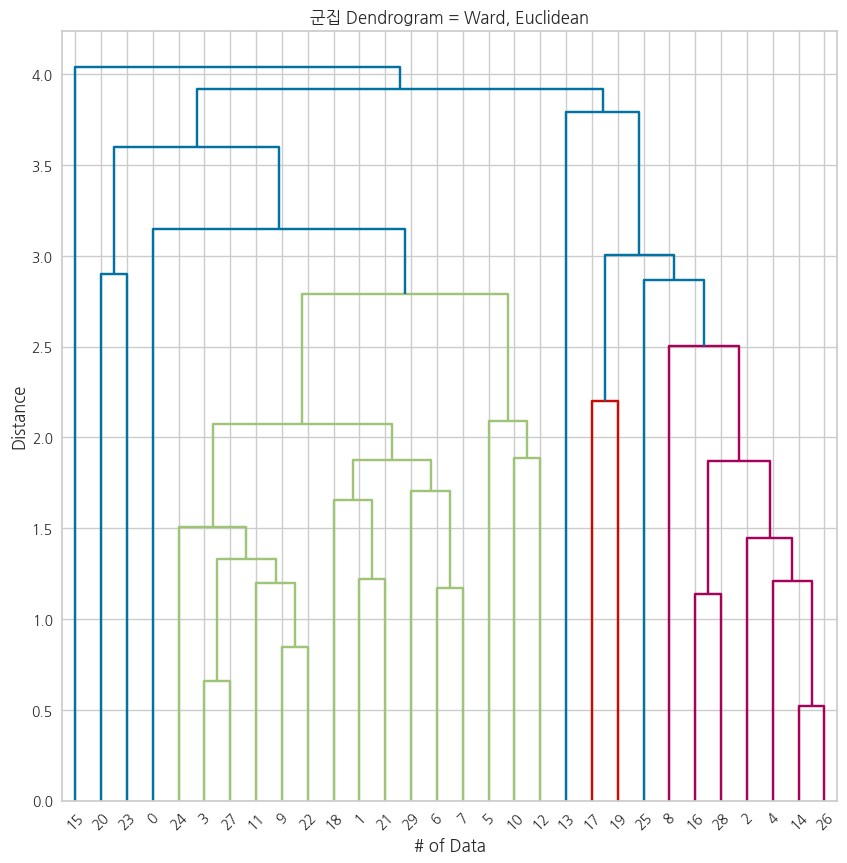

In [12]:
# p 269 연습
# 덴드로그램 [연결 : ward, 거리 계산 : Euclidean]
plt.figure(figsize = (10, 10))
ax = plt.subplot(111)

dendrogram(Z_average, leaf_font_size = 10, orientation = "top")
plt.title("군집 Dendrogram = Ward, Euclidean") # 제목
plt.xlabel("# of Data") # x축
plt.ylabel("Distance") # y축

In [13]:
# z_ward와 z_avaerage 모두 거리 계산 방식은 Euclidean, 연결 방식은 1번 ward, 2번 average 사용
# -> 서로 다른 형태의 Dendrogram이 생성됨

In [15]:
# p271 연습
# 계층형 군집분석 - 군집 저장

# linkage 함수를 통해 얻은 Z_ward 행렬 데이터를 이용하여 군집 생성
cluster_H = fcluster(Z = Z_ward, t = 5, criterion = "distance") 
# 군집생성 기준은 거리로 잡고 임계값을 5로 정한 후 Z_ward 데이터 입력

df_raw["cluster_H"] = cluster_H # 새로운 행 생성
df_raw.head()

# 군집 번호 자체는 식별자로 우선순위 등의 의미는 없음

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,cluster_H
0,43,51,30,39,61,92,45,1
1,63,64,51,54,63,73,47,5
2,71,70,68,69,76,86,48,3
3,61,63,45,47,54,84,35,1
4,81,78,56,66,71,83,47,3


In [19]:
# P272 연습
# 계층형 군집분석 - 군집 요약

# 집계 함수를 이용한 군집별 데이터 요약
df_summary_H = df_raw.groupby("cluster_H").agg(["min","mean","max"])
df_summary_H


EVAL                DISSATIS                PRIVILEGE             \
           min       mean max      min       mean max       min       mean   
cluster_H                                                                    
1           43  57.428571  67       51  58.857143  66        30  43.571429   
2           40  53.200000  69       37  49.400000  62        33  46.800000   
3           50  71.888889  85       58  73.888889  85        54  63.333333   
4           68  70.000000  72       82  82.500000  83        72  77.500000   
5           58  69.142857  82       61  72.714286  90        39  47.142857   

              CHANCE  ...     ADVANCE                CRITISM                 \
          max    min  ... max     min       mean max     min       mean max   
cluster_H             ...                                                     
1          52     39  ...  50      51  59.428571  66      74  81.142857  92   
2          57     34  ...  58      43  52.000000  58      49  60.000000  67   
3          71     54  ...  75      55  74.333333  88      74  79.000000  86   
4          83     45  ...  67      59  65.000000  71      77  80.000000  83   
5          52     54  ...  72      60  66.285714  75      54  72.000000  85   

          PROMOTION                 
                min       mean max  
cluster_H                           
1                33  38.571429  45  
2                25  35.000000  49  
3                46  54.666667  72  
4                31  33.000000  35  
5                35  40.714286  47  

[5 rows x 21 columns]

In [22]:
# P272 연습
# 집계 함수를 이용할 경우 열 이름이 두 줄에 걸쳐 나오므로 한 줄로 변환
level0 = df_summary_H.columns.get_level_values(0) # 첫번째 목차
level1 = df_summary_H.columns.get_level_values(1) # 두번째 목차
df_summary_H.columns = level0 + "-" + level1 # 첫번째 목차_두번째 목차
df_summary_H.reset_index(inplace = True) #인덱스 생성하고
df_summary_H.round(3) # 소수점 3자리

# 각 군집 별 변수 분포가 다름 (평균 등 통계량 확인)

,cluster_H,EVAL-min,EVAL-mean,EVAL-max,DISSATIS-min,DISSATIS-mean,DISSATIS-max,PRIVILEGE-min,PRIVILEGE-mean,PRIVILEGE-max,...,CHANCE-max,ADVANCE-min,ADVANCE-mean,ADVANCE-max,CRITISM-min,CRITISM-mean,CRITISM-max,PROMOTION-min,PROMOTION-mean,PROMOTION-max
0,1,43,57.429,67,51,58.857,66,30,43.571,52,...,50,51,59.429,66,74,81.143,92,33,38.571,45
1,2,40,53.200,69,37,49.400,62,33,46.800,57,...,58,43,52.000,58,49,60.000,67,25,35.000,49
2,3,50,71.889,85,58,73.889,85,54,63.333,71,...,75,55,74.333,88,74,79.000,86,46,54.667,72
3,4,68,70.000,72,82,82.500,83,72,77.500,83,...,67,59,65.000,71,77,80.000,83,31,33.000,35
4,5,58,69.143,82,61,72.714,90,39,47.143,52,...,72,60,66.286,75,54,72.000,85,35,40.714,47


In [24]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   EVAL       30 non-null     int64
 1   DISSATIS   30 non-null     int64
 2   PRIVILEGE  30 non-null     int64
 3   CHANCE     30 non-null     int64
 4   ADVANCE    30 non-null     int64
 5   CRITISM    30 non-null     int64
 6   PROMOTION  30 non-null     int64
 7   cluster_H  30 non-null     int32
dtypes: int32(1), int64(7)
memory usage: 1.9 KB


<Axes: title={'center': 'EVAL'}, xlabel='cluster_H'>

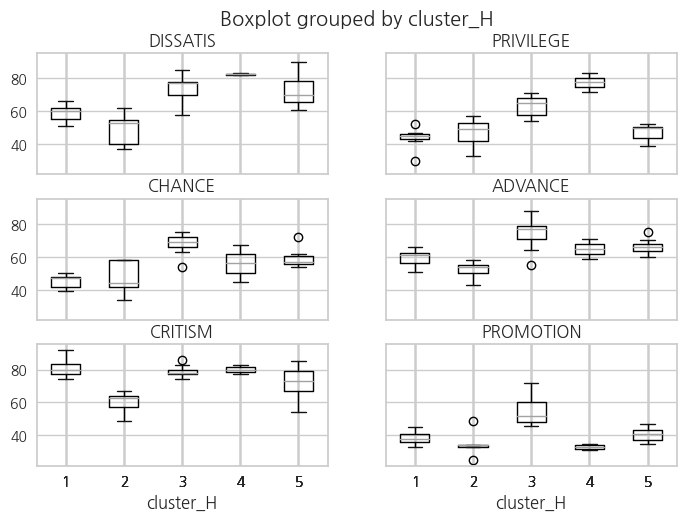

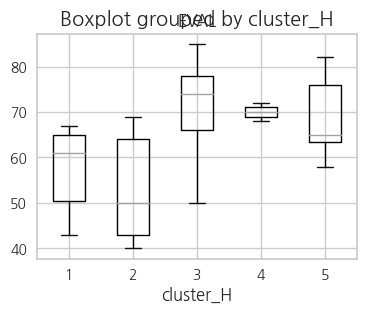

In [25]:
# p273 연습
# 계층형 군집분석 - 군집 요약
# Boxplot을 활용한 군집별 설명변수 분포
df_raw.boxplot(column=["DISSATIS", "PRIVILEGE", "CHANCE", "ADVANCE", "CRITISM", "PROMOTION"], by = "cluster_H")

# Boxplot을 활용한 군집별 목표변수 분포
df_raw.boxplot(column=["EVAL"], by = "cluster_H", figsize = (4,3))

# 3번 군집은 "CHANCE"와 "PROMOTION" 평균이 상대적으로 높음 -> 목표변수(EVAL) 평균이 높음

In [27]:
# p274 연습
# K-평균 군집분석 - 군집 형성
#- 군집 개수 찾기 : 각 데이터로부터 가장 가까운 군집 중심점까지의 거리 제곱합

# 최대 군집 생성 개수
n_iter_cluster = 15 # 클러스터 생성 15개
cluster_range = [i+1 for i in range(n_iter_cluster)] # 0부터 14까지
clus_error = [] # 빈 배열 생성
for v_n_clus in cluster_range: # 0~14 범위 까지
    clus = KMeans(v_n_clus) # k평균
    clus.fit(df_raw_x)

    # 각 데이터로부터 가장 가까운 군집 중심점까지 거리 제곱합
    clus_error.append(clus.inertia_)

df_error = pd.DataFrame({"NumberofCluster": cluster_range, "Error": clus_error})
df_error.round(3)

# error : 군집분석 ~ 군집 내 자료 간의 거리 제곱, sum of square
# 군집 수가 증감함에 따라 각 군집의 중심점과 해당 군집의 자료 간의 거리는 줄어듦

,NumberofCluster,Error
0,1,180.000
1,2,114.083
2,3,93.933
3,4,79.515
4,5,69.098
5,6,56.632
6,7,49.938
7,8,44.721
8,9,37.569
9,10,34.535


Text(0, 0.5, 'Sum of Square')

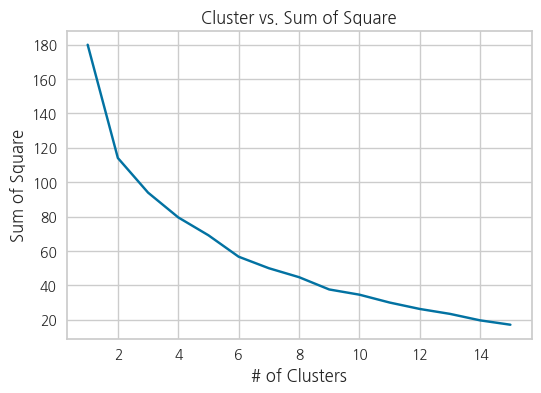

In [29]:
# P275 연습
# K-평균 군집분석 - 군집 형성
#- 군집별 군집 중시점까지 거리 제곱합을 시각화

plt.figure(figsize=(6,4))
plt.plot(df_error["NumberofCluster"], df_error["Error"])
plt.title("Cluster vs. Sum of Square")
plt.xlabel("# of Clusters")
plt.ylabel("Sum of Square")

#  적절한 군집 수 결정

In [30]:
# p276 연습
# k-평균 군집분석 - 군집 저장

clus = KMeans(5) # 5개 지정
clus.fit(df_raw_x)
cluster_KM = [i+1 for i in clus.labels_]
df_raw["cluster_KM"] = cluster_KM
df_raw.head(10)

# 군집 수 = 5로 결정 -> 계층형 군집(5개)과 형성된 자료 비교 가능

# 인덱스 기준 군집 확인(군집 번호 자체는 식별자로 우선순위 등의 의미는 없음)
# - 계층형 : 0, 3번 vs 2,4 번, vs  1번 군집 형성
# - K평균 : 동일하게 형성 (*참고 : k평균 군집 형성은 초기 seed 값에 따라 군집이 달라질 수 있음)

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,cluster_H,cluster_KM
0,43,51,30,39,61,92,45,1,2
1,63,64,51,54,63,73,47,5,5
2,71,70,68,69,76,86,48,3,3
3,61,63,45,47,54,84,35,1,2
4,81,78,56,66,71,83,47,3,3
5,43,55,49,44,54,49,34,2,4
6,58,67,42,56,66,68,35,5,5
7,71,75,50,55,70,66,41,5,5
8,72,82,72,67,71,83,31,4,3
9,67,61,45,47,62,80,41,1,2


In [31]:
# P 277 연습
# k-평균 군집분석 - 군집 요약
df_summary_KM = df_raw.drop("cluster_H", axis = 1, inplace = False).groupby("cluster_KM").agg(["min", "mean", "max"])

level0 = df_summary_KM.columns.get_level_values(0) # 첫번째 목차
level1 = df_summary_KM.columns.get_level_values(1) # 두번째 목차
df_summary_KM.columns = level0 + "-" + level1 # 첫번째 목차_두번째 목차
df_summary_KM.reset_index(inplace = True) #인덱스 생성하고
df_summary_KM.round(3) # 소수점 3자리

# 각 군집 별 변수 분포가 다름 (평균 등 통계량 확인)

,cluster_KM,EVAL-min,EVAL-mean,EVAL-max,DISSATIS-min,DISSATIS-mean,DISSATIS-max,PRIVILEGE-min,PRIVILEGE-mean,PRIVILEGE-max,...,CHANCE-max,ADVANCE-min,ADVANCE-mean,ADVANCE-max,CRITISM-min,CRITISM-mean,CRITISM-max,PROMOTION-min,PROMOTION-mean,PROMOTION-max
0,1,66,76.000,85,75,79.800,85,54,62.600,71,...,74,77,80.600,88,74,76.800,79,46,57.000,72
1,2,43,57.429,67,51,58.857,66,30,43.571,52,...,50,51,59.429,66,74,81.143,92,33,38.571,45
2,3,50,67.833,81,58,71.833,83,56,68.667,83,...,75,55,66.000,76,77,81.167,86,31,45.500,60
3,4,40,50.500,69,37,48.500,62,33,45.250,57,...,58,43,50.500,55,49,58.250,64,25,35.250,49
4,5,58,68.500,82,53,70.250,90,39,47.875,53,...,72,58,65.250,75,54,71.375,85,34,39.875,47


<Axes: title={'center': 'EVAL'}, xlabel='cluster_KM'>

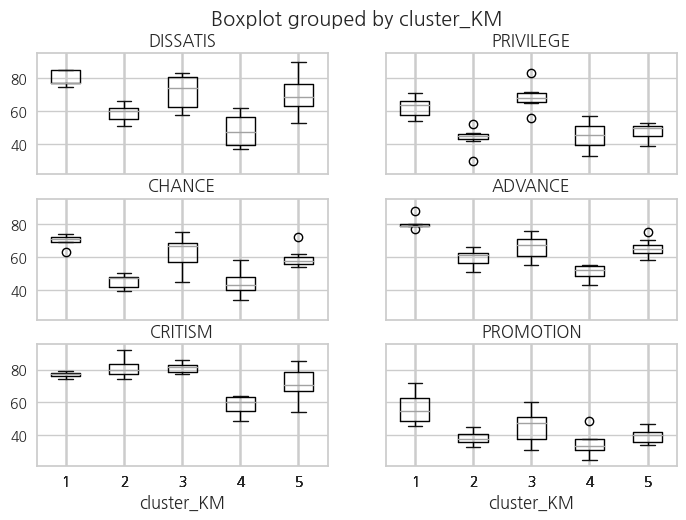

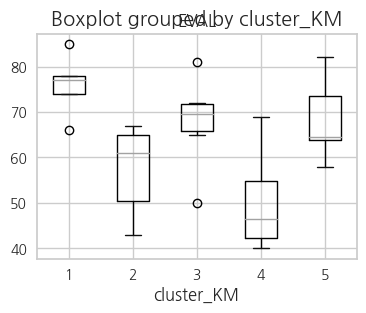

In [32]:
# p 278 연습
# K-평균 군집분석 - 군집 요약

# Boxplot을 활용한 군집별 설명변수 분포
df_raw.boxplot(column=["DISSATIS", "PRIVILEGE", "CHANCE", "ADVANCE", "CRITISM", "PROMOTION"], by = "cluster_KM")

# Boxplot을 활용한 군집별 목표변수 분포
df_raw.boxplot(column=["EVAL"], by = "cluster_KM", figsize = (4,3))

# 2번 군집은 "CHANCE"와 "ADVANCE", "PROMOTION" 평균이 상대적으로 높음 -> 목표변수(EVAL) 평균이 높음

In [54]:
# p279 연습
# 적정 군집 수 결정 - 실루엣 계수

# scipy.cluster.hierarchy의 계층형 군집분석은 실루엣 계수 산출 안됨
# 실루엣 계수 산출 : sklearn.AgglomerativeClustering(계층형군집분석)
cls_h = AgglomerativeClustering(n_clusters=3).fit_predict(df_raw_x)
sil_score = silhouette_score(df_raw, cls_h, metric = 'euclidean')
print("계층형(군집 수 = 3) 실루엣 계수 = ", format(round(sil_score,3)))

cls_h = AgglomerativeClustering(n_clusters=3).fit_predict(df_raw_x)
sil_score = silhouette_score(df_raw, cls_h, metric = 'euclidean')
print("계층형(군집 수 = 4) 실루엣 계수 = ", format(round(sil_score,3)))

ValueError: could not convert string to float: 'CS-102'

In [55]:
# p279 연습
# 적정 군집 수 결정 - 실루엣 계수

# 실루엣 계수 산출 : sklearn.KMeans(k평균군집분석)
cls_k = KMeans(3).fit_predict(df_raw_x) # 군집 수 = 3
sil_score = silhouette_score(df_raw_x, cls_k)
print("k-평균(군집 수 = 3) 실루엣 계수 = ", format(round(sil_score, 3)))

cls_k = KMeans(4).fit_predict(df_raw_x) # 군집 수 = 4
sil_score = silhouette_score(df_raw_x, cls_k)
print("k-평균(군집 수 = 4) 실루엣 계수 = ", format(round(sil_score, 3)))

# 실루엣 계수가 높을수록 (1에 가까울수록) 군집이 효율적으로 형성되었다고 판단됨.
# -군집 개수는 계층형 4개, K평균은 3개가 적절해 보임
# -k평균 군집분석의 실루엣 계수는 실행시 마다 값이 달라질 수 있음 -초기 seed 변화 때문

k-평균(군집 수 = 3) 실루엣 계수 =  0.222
k-평균(군집 수 = 4) 실루엣 계수 =  0.193


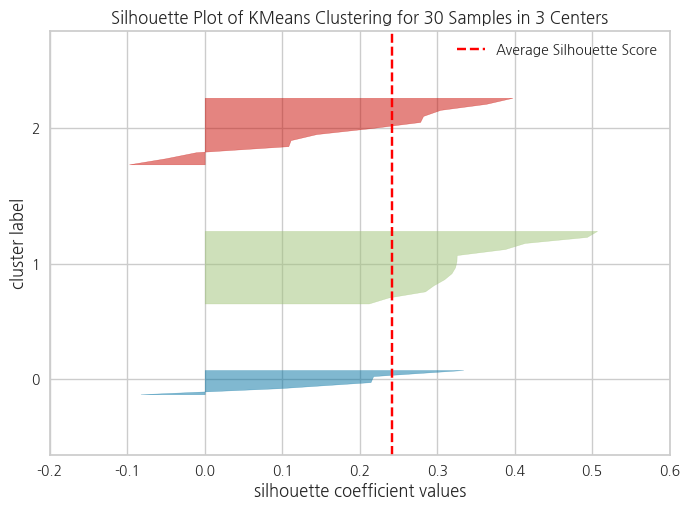

실루엣 게수 = 0.2417


In [38]:
# p280 연습
# 적정 군집 수 결정 -실루엣 계수

# yellowbrick 라이브러리의 silhouetteVisualizer 이용
clus = KMeans(3)
graph_sil = SilhouetteVisualizer(clus, colors='yellowbrick')

# 생성된 visualizer에 데이터 입력
graph_sil.fit(df_raw_x)
graph_sil.show()
print("실루엣 게수 =", format(round(graph_sil.silhouette_score_, 4)))

# K평균 군집분석의 실루엣 계수는 실행시 마다 값이 달라질 수 있음 - 초기 seed 변화 떄문

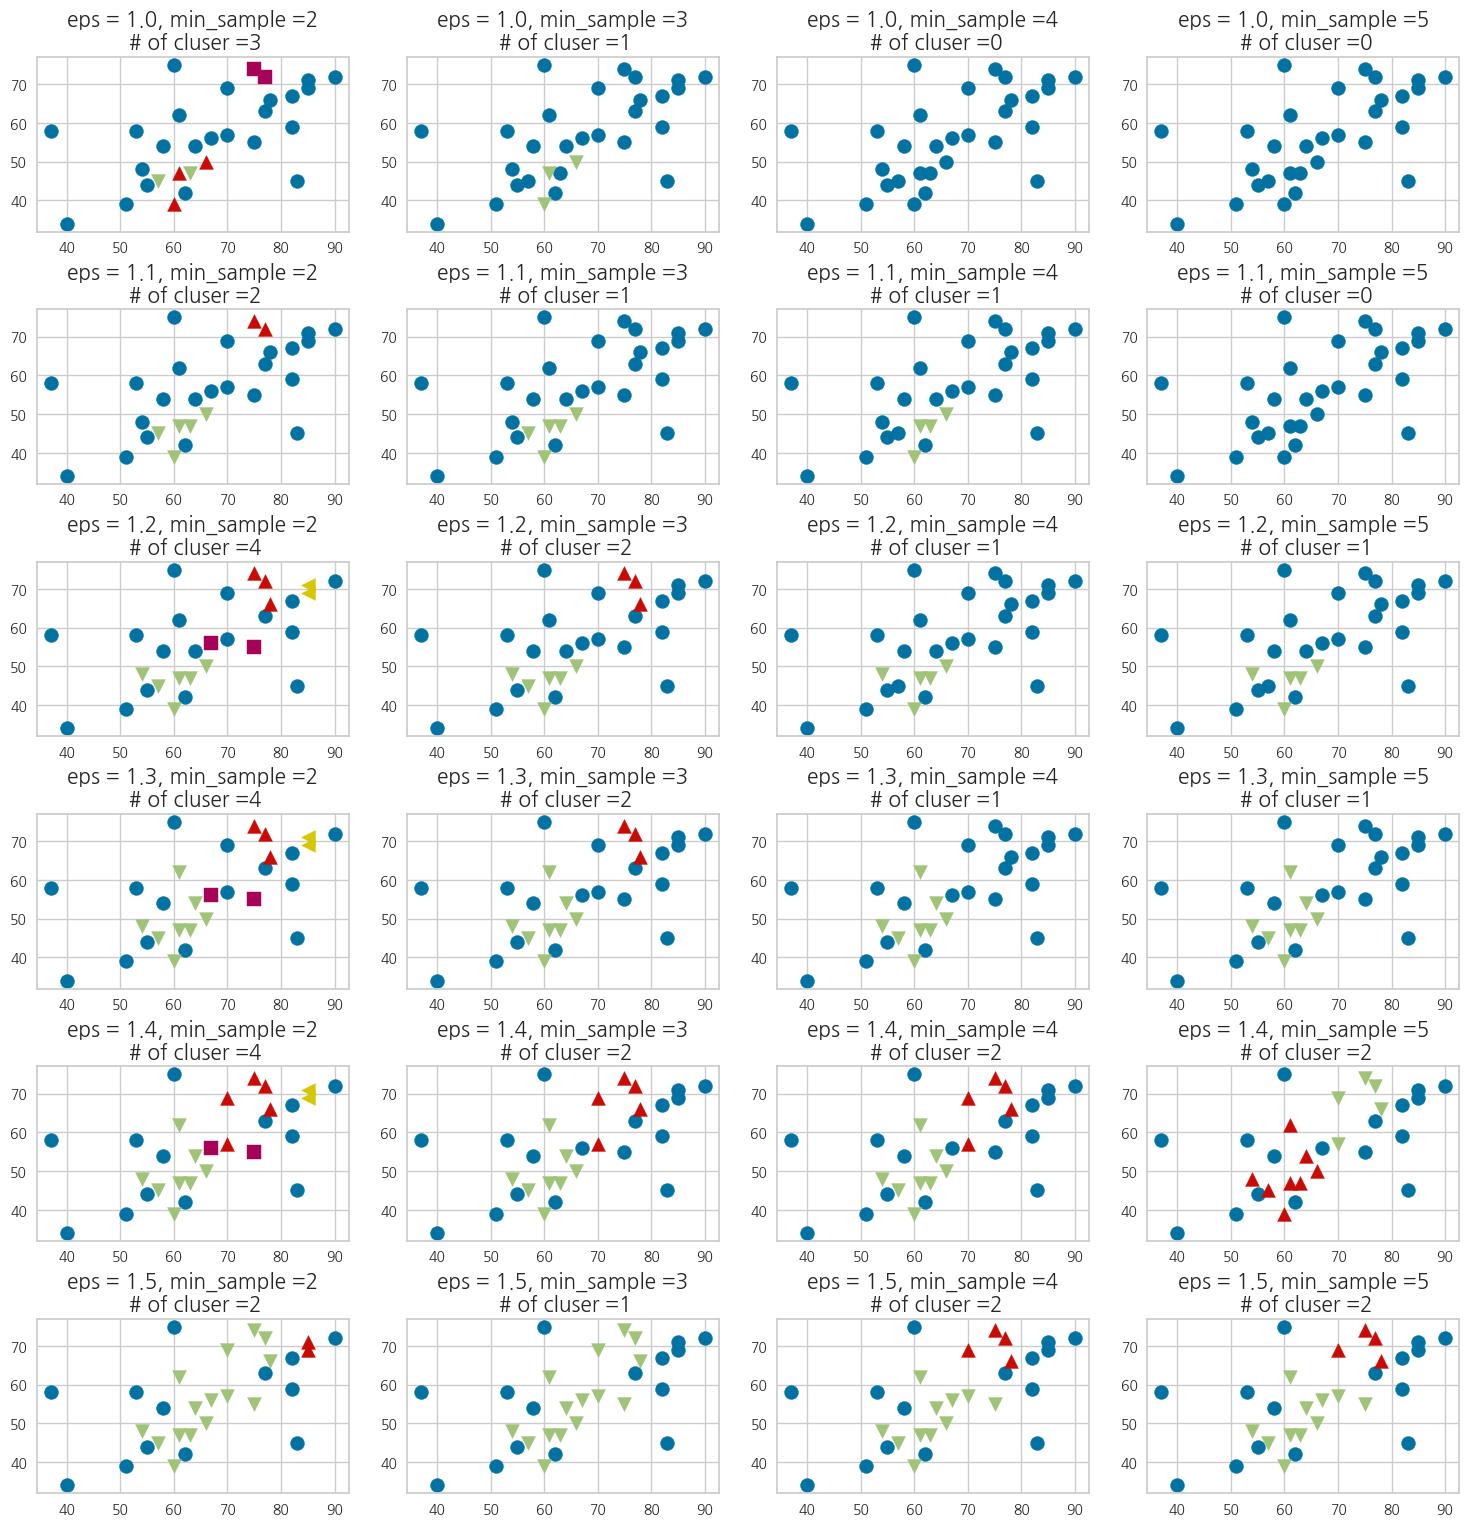

In [41]:
# p281 연습
# DBSCAN 군집분석 - 참조

# X축 : DISSATIS변수, y축 : CHANCE
X = df_raw["DISSATIS"]
Y = df_raw["CHANCE"]

# 데이터 point 그림 종류
markers = ["o", "v", "^", "s", "<", ">", "p", "D"]

para_eps = [k/10 for k in range(10, 16, 1)]
para_min_sample = [2, 3, 4, 5]

# eps : 1.0 ~ 1.5, min_sample : 2 ~ 5
fig, axes = plt.subplots(len(para_eps), len(para_min_sample), figsize = (15, 15)) # plot 개수
fig.tight_layout(w_pad = 1, h_pad = 3) # plot 간 간격

# enumerate() : 값의 index와 값을 순차적으로 반환
for i, eps in enumerate(para_eps):
    for j, min_sample in enumerate(para_min_sample):
        dbscan = DBSCAN(min_samples = min_sample, eps = eps) # dbscan 실행
        clusters = dbscan.fit_predict(df_raw_x) # 예측 분류
        clusters = clusters + 1 # noise의 경우 -1로 표기되므로 1씩 더하여 0으로 변환
        for (n_clus, clus) in enumerate(range(min(clusters), max(clusters) +1 ,1)): # 군집별 다른 그림 지정
            axes[i, j].scatter(X[clusters == clus], Y[clusters == clus], marker = markers[n_clus], s = 100)
            axes[i, j].set_title("eps = " + str(eps) + ", min_sample =" + str(min_sample) + \
                                "\n # of cluser =" + str(max(clusters)), fontsize = 15)
            
# 1. 거리가 길고 (eps = 1.4) 최소 자료 수가 적으면(min_sample = 2) 군집이 여러 개 생성
# 2. 거리가 짧고 (eps = 1) 최소 자료 수가 많아(min_sample = 5) 군집이 생성되지 않음

In [46]:
# P283 연습
# dbscan 군집분석-참조

# eps: 특정 데이터로부터 다른 데이터를 포함하는 거리 min_samples: 군집이 되기 위한 최소 데이터 수
dbscan = DBSCAN(eps = 1.4, min_samples = 2).fit(df_raw_x)

# 군집 결과
cluster_DB = dbscan.labels_

# sklearn의 DBSCAN에서는 noise 데이터의 경우 군집이 -1로 표시되며 0번 군집부터 시작
# 다른 계층형, k-평균은 1번 군집부터 시작하므로 다른 군집 번호와 동일, noise 데이터는 0번 군집으로 표기
for(i, val) in enumerate(cluster_DB):
    if val < 0:
        cluster_DB[i] = 0
    else:
        cluster_DB[i] = cluster_DB[i] + 1
    
df_raw["cluster_DB"] = cluster_DB
df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,cluster_H,cluster_KM,cluster_DB
0,43,51,30,39,61,92,45,1,2,0
1,63,64,51,54,63,73,47,5,5,1
2,71,70,68,69,76,86,48,3,3,2
3,61,63,45,47,54,84,35,1,2,1
4,81,78,56,66,71,83,47,3,3,2


In [48]:
# p284 연습
# DBSCAN 군집분석-참조

# db스캔 군집별 요약 통계량
df_summary_DB = df_raw.drop(["cluster_H", "cluster_KM"], axis = 1, inplace=False).groupby("cluster_DB").agg(["min", "mean", "max"])

level0 = df_summary_DB.columns.get_level_values(0) # 첫번째 목차
level1 = df_summary_DB.columns.get_level_values(1) # 두번째 목차
df_summary_DB.columns = level0 + "-" + level1 # 첫번째 목차_두번째 목차
df_summary_DB.reset_index(inplace = True) #인덱스 생성하고
df_summary_DB.round(3) # 소수점 3자리

,cluster_DB,EVAL-min,EVAL-mean,EVAL-max,DISSATIS-min,DISSATIS-mean,DISSATIS-max,PRIVILEGE-min,PRIVILEGE-mean,PRIVILEGE-max,...,CHANCE-max,ADVANCE-min,ADVANCE-mean,ADVANCE-max,CRITISM-min,CRITISM-mean,CRITISM-max,PROMOTION-min,PROMOTION-mean,PROMOTION-max
0,0,40,61.00,82,37,63.846,90,30,54.385,83,...,75,43,60.154,88,49,70.615,92,25,41.923,72
1,1,48,60.75,67,54,60.750,66,42,47.250,52,...,62,51,60.500,66,73,78.625,84,33,39.125,47
2,2,65,74.40,81,70,74.000,78,46,56.400,68,...,74,71,76.200,80,77,81.800,86,46,47.200,49
3,3,58,64.50,71,67,71.000,75,42,46.000,50,...,56,66,68.000,70,66,67.000,68,35,38.000,41
4,4,74,79.50,85,85,85.000,85,64,67.500,71,...,71,77,78.000,79,74,76.500,79,55,59.000,63


In [ ]:
# p266 연습
#아래는 감독자의 직무능력평가 데이터이다. 2가지 (계층, K-평균) 군집분석을 실시하고 결과를 해석하시오.
#데이터 : 직무능력평가.csv( 변수 : 7개, 자료 수 : 30개)

# 1. 데이터 구성하기
# 2. 데이터 전처리(포준화)
# 3. 계층형 군집분석 실시

# -연결방법 변경 및 결과 비교

# -군집 프로파일